In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('WineQT.csv')
df.head()

In [ ]:
df.shape
df.info()
df.describe()

In [ ]:
df=df.drop(columns='Id')
df.head()

In [ ]:
df['quality'].value_counts()

In [ ]:
# Dealing with missing values
df.isnull().sum()

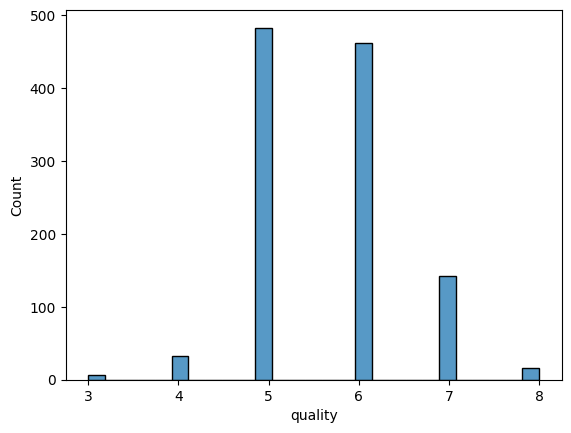

In [ ]:
sns.histplot(df['quality'])
plt.show()

In [ ]:
df_2=df.drop(columns=['quality'])
df_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


<Axes: title={'center': 'Correlation with target'}>

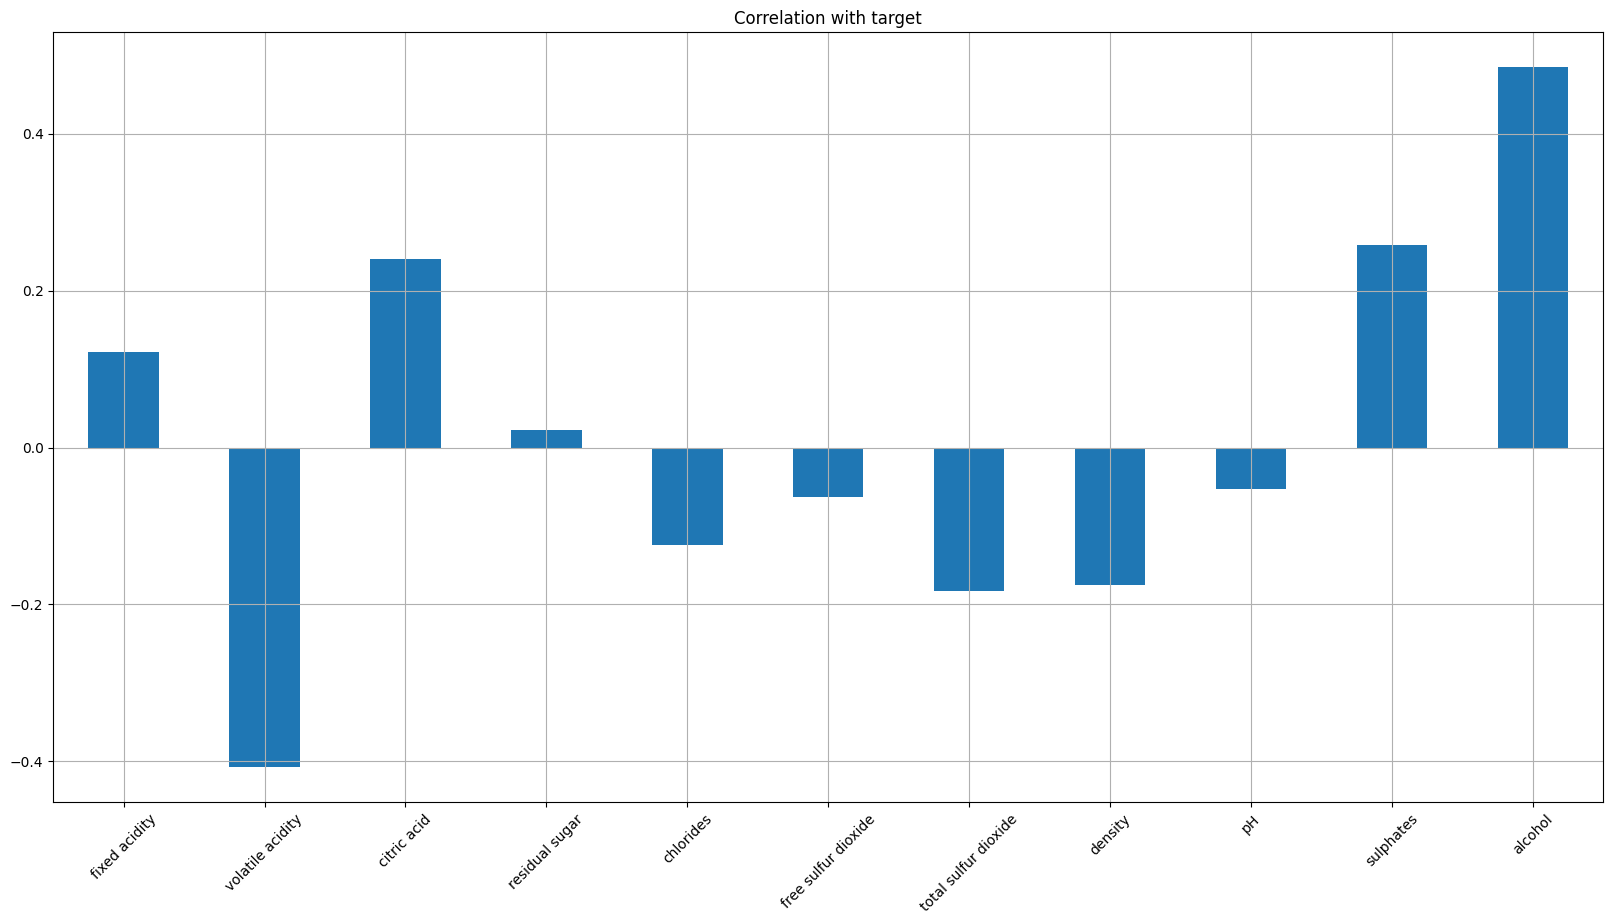

In [ ]:
df_2.corrwith(df['quality']).plot.bar(
    figsize=(20,10),title='Correlation with target',rot=45,grid=True
)

In [ ]:
corr=df.corr()
corr

<Axes: >

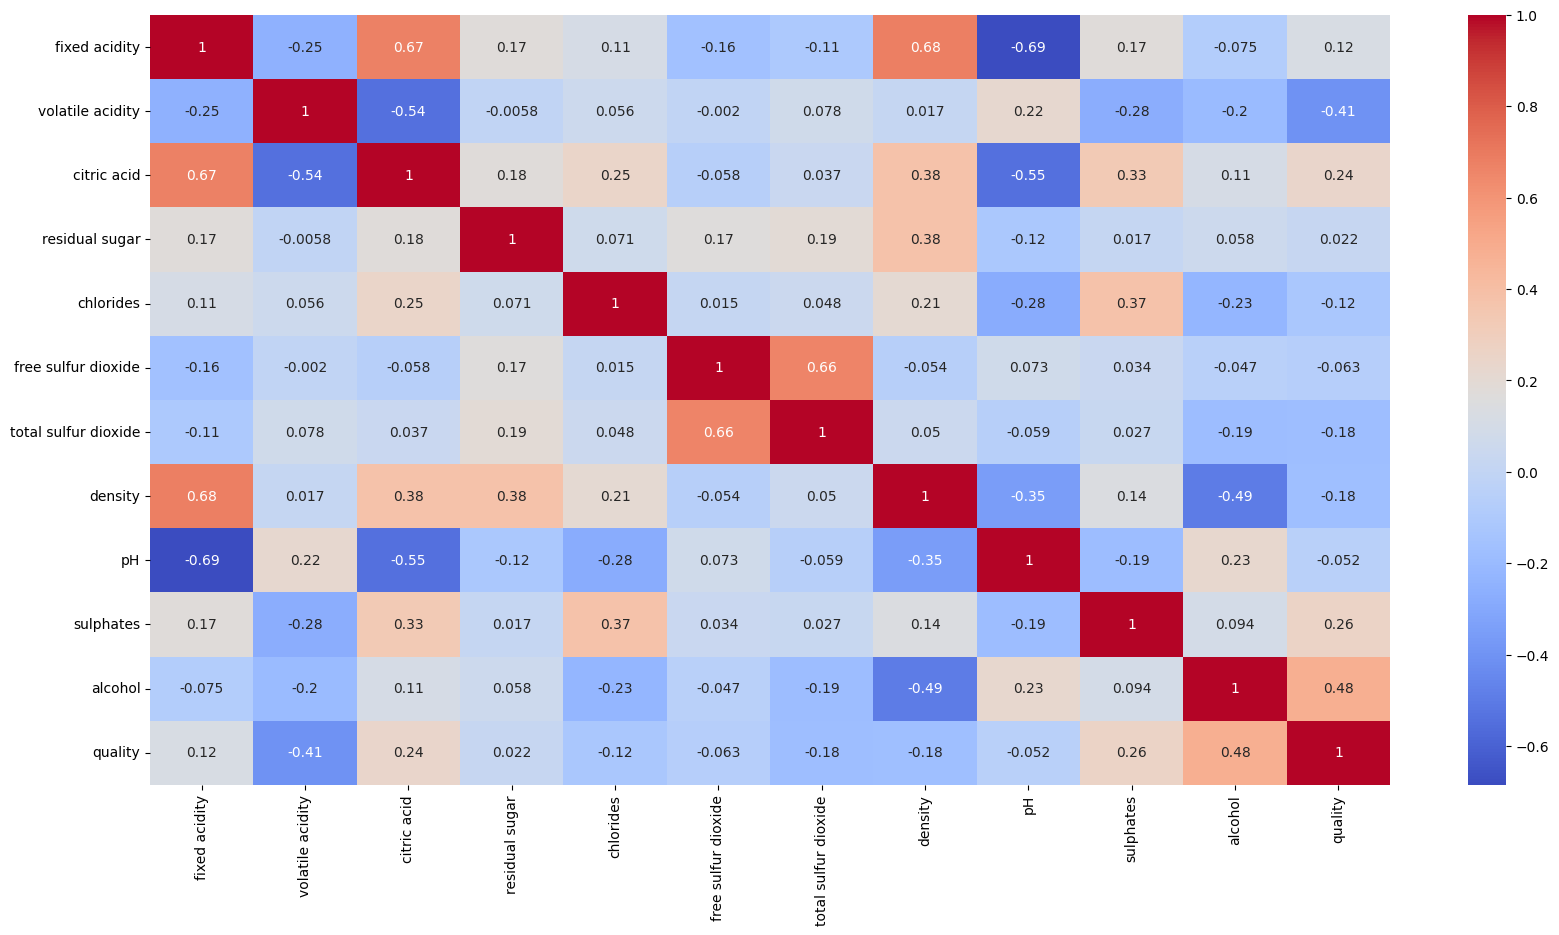

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,cmap='coolwarm',annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['quality']),df['quality'],
                                               test_size=0.2,random_state=0)

In [ ]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(229,)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_1=LogisticRegression(multi_class='ovr')